# 1. INTRODUCTION

Name: Sifra Hilda Juliana Siregar


# 2. IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
import warnings
import phik
from elasticsearch import Elasticsearch
from phik import phik_matrix
from great_expectations.data_context import FileDataContext

# 3. DATA LOADING

## A. Import Warnings

In [ ]:
warnings.filterwarnings('ignore')

## B. Load Data 

In [ ]:
#load data from big query
conn = psycopg2.connect(
            host="localhost",
            port="5432",
            user="postgres",
            password="postgres",
            database="milestone3"
        )
data = pd.read_sql ('SELECT * FROM table_m3', conn)
data.to_csv('data_raw.csv', index=False)

In [ ]:
#show the data
data

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_score,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,85936,Laurel Court,950 Mason St,San Francisco,CA,94108,NaN,NaN,None,1.415578e+10,...,100.0,Routine - Unscheduled,None,None,None,NaN,NaN,NaN,NaN,NaN
1,5827,HILLCREST ELEMENTARY SCHOOL,810 SILVER Ave,San Francisco,CA,94134,37.729016,-122.419253,POINT (-122.419253 37.729016),1.415546e+10,...,NaN,Reinspection/Followup,None,None,None,92.0,92.0,2.0,2.0,7.0
2,94910,Ike's Kitchen,800 Van Ness Ave,San Francisco,CA,94109,NaN,NaN,None,NaN,...,NaN,New Ownership - Followup,None,None,None,NaN,NaN,NaN,NaN,NaN
3,64667,Jasmine Rae Bakery,1890 Bryant St #309,San Francisco,CA,94110,37.763156,-122.410351,POINT (-122.410351 37.763156),NaN,...,NaN,Reinspection/Followup,None,None,None,53.0,53.0,3.0,2.0,20.0
4,97722,THE CHURRO FACTORY,PIER 39 K-01,San Francisco,CA,94133,NaN,NaN,None,NaN,...,96.0,Routine - Unscheduled,97722_20181217_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53968,70220,Trader Joe's #200,1095 Hyde St,San Francisco,CA,94109,NaN,NaN,None,1.415530e+10,...,NaN,Complaint,None,None,None,NaN,NaN,NaN,NaN,NaN
53969,95021,Wing Wings,422 Haight St,San Francisco,CA,94117,NaN,NaN,None,1.415584e+10,...,92.0,Routine - Unscheduled,95021_20190228_103119,Inadequate and inaccessible handwashing facili...,Moderate Risk,NaN,NaN,NaN,NaN,NaN
53970,78289,Sam Jordans Bar,4004 03rd St,San Francisco,CA,94124,NaN,NaN,None,NaN,...,NaN,Reinspection/Followup,None,None,None,NaN,NaN,NaN,NaN,NaN
53971,100887,ASIA CHINESE FOOD,350 BAY ST.,San Francisco,CA,94133,NaN,NaN,None,1.415582e+10,...,NaN,New Ownership - Followup,None,None,None,NaN,NaN,NaN,NaN,NaN


In [ ]:
#show the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

# 4. EXPLORATORY DATA ANALYSIS

In [ ]:
pd.set_option('display.max_columns', None)  

In [ ]:
#change columns name
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns = data.columns.str.lower()

In [ ]:
#show data duplicated
data.duplicated().sum()

43

In [ ]:
#show missing values
data.isnull().sum()

business_id                         0
business_name                       0
business_address                    0
business_city                       0
business_state                      0
business_postal_code             1186
business_latitude               26498
business_longitude              26498
business_location               26513
business_phone_number           36301
inspection_id                       0
inspection_date                     0
inspection_score                14432
inspection_type                     0
violation_id                    13720
violation_description           13720
risk_category                   13720
neighborhoods                   26538
sf_find_neighborhoods           26538
current_police_districts        26526
current_supervisor_districts    26526
analysis_neighborhoods          26526
dtype: int64

# 5. DATA CLEANING

In [ ]:
#drop missing value
data = data.dropna().reset_index(drop=True)

interval columns not set, guessing: ['business_id', 'business_latitude', 'business_longitude', 'business_phone_number', 'inspection_score', 'neighborhoods', 'sf_find_neighborhoods', 'current_police_districts', 'current_supervisor_districts', 'analysis_neighborhoods']


/Users/sifrasiregar/anaconda3/envs/hacktiv/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3482145. Are interval variables set correctly?
  warnings.warn(
/Users/sifrasiregar/anaconda3/envs/hacktiv/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3471735. Are interval variables set correctly?
  warnings.warn(
/Users/sifrasiregar/anaconda3/envs/hacktiv/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3305175. Are interval variables set correctly?
  warnings.warn(
/Users/sifrasiregar/anaconda3/envs/hacktiv/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 3268740. Are interval variables set correctly?
  warnings.warn(
/Users/sifrasiregar/anaconda3/envs/hacktiv/lib/python3.11/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 8853705. Are interval variables set correctly?
  warnings.warn(


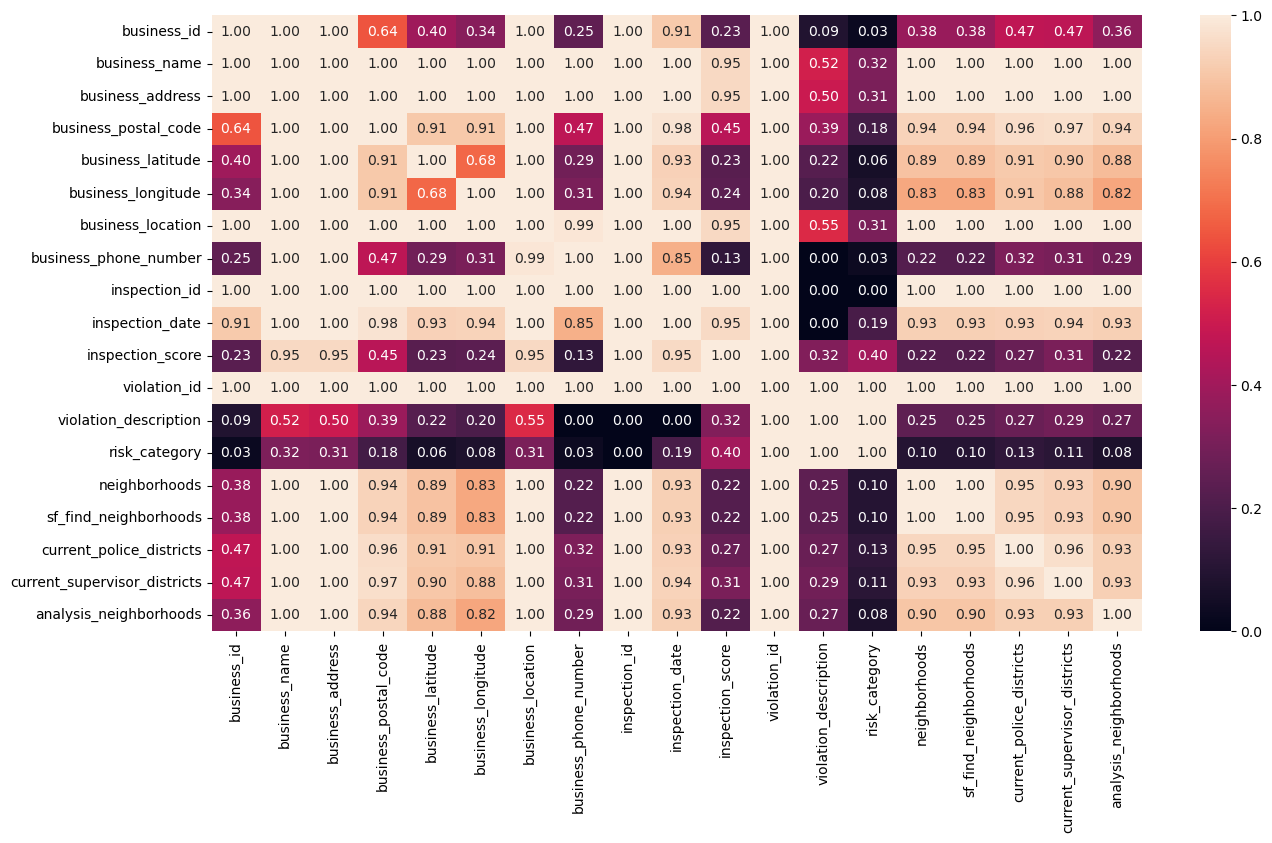

In [ ]:
# phik correlation
phik_matrix = data.phik_matrix()

# visualization
plt.figure(figsize=(15,8))
sns.heatmap(phik_matrix, annot=True, fmt=".2f")
plt.show()

In [ ]:
#drop columns
columns_to_drop = [
        'business_city', 'business_state', 'business_latitude', 
        'business_longitude', 'business_location', 'business_phone_number', 
        'inspection_id', 'violation_id', 
        'neighborhoods', 'sf_find_neighborhoods', 
        'current_police_districts', 
        'analysis_neighborhoods']
data = data.drop(columns=columns_to_drop, errors='ignore')

The data includes information for all restaurants in San Francisco, California. To streamline and focus on relevant features, consider dropping the following columns:

- Business_city and Business_state, as the data is specific to San Francisco, California.

- Business Latitude, Business Longitude, and Business Location, since they duplicate information already present in Business Postal Code and Business address.

- Business Phone, as it is not pertinent to the analysis.

- Inspection ID and Violation ID, as they are not needed for the intended analysis.

- Neighborhood, SF Find Neighborhoods, Current Police Districts, and Analysis Neighborhood, due to a high percentage of missing values (51%) and a lack of strong correlation with Inspection Score.

In [ ]:
#change data types
data_types = {
        'business_id': 'int64',
        'business_name': 'string',
        'business_address': 'string',
        'business_postal_code': 'string',
        'inspection_date': 'string',  
        'inspection_score': 'float64',
        'inspection_type': 'string',
        'violation_description': 'string',
        'risk_category': 'string',
        'current_supervisor_districts': 'string'  
    }
data = data.astype(data_types)

In [ ]:
def getdata():
    conn = psycopg2.connect(
            host="localhost",
            port="5432",
            user="postgres",
            password="postgres",
            database="milestone3"
        )
    data = pd.read_sql ('SELECT * FROM table_m3', conn)
    data.to_csv('data_raw.csv', index= False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   business_id                   53973 non-null  int64  
 1   business_name                 53973 non-null  object 
 2   business_address              53973 non-null  object 
 3   business_city                 53973 non-null  object 
 4   business_state                53973 non-null  object 
 5   business_postal_code          52787 non-null  object 
 6   business_latitude             27475 non-null  float64
 7   business_longitude            27475 non-null  float64
 8   business_location             27460 non-null  object 
 9   business_phone_number         17672 non-null  float64
 10  inspection_id                 53973 non-null  object 
 11  inspection_date               53973 non-null  object 
 12  inspection_score              39541 non-null  float64
 13  i

# 5. DAG Function

In [ ]:

def getdata():
    ''' 
    This function is to retrieve the data from a specific table in PostgreSQL database and save it to SQL.
     
    Parameters: 
     - host: the database server address
     - port: the port number on the database server
     - user: the username for database access
     - password: the password for database access
     - database: name of the database to connect to
      
    Data Save:
     - the data will be saved to csv file
      
    Example of Usage: 
     - this project will be using function called 'getdata' to grab the data information from a table named 'table_m3' in a database and will be saved
       on a file called 'data_raw.csv'
      '''
    conn = psycopg2.connect(
            host="localhost",
            port="5432",
            user="postgres",
            password="postgres",
            database="milestone3"
        )
    data = pd.read_sql ('SELECT * FROM table_m3', conn)
    data.to_csv('data_raw.csv')

In [ ]:
def clean(df_path):
    ''' 
    To clean and prepare a dataset from a CSV file for analysis by selecting specific columns, adjusting data types, 
    and removing duplicates and missing values, then saving the cleaned data to a new CSV file.
    
    Parameters:
    'df_path': the file path of the CSV file containing the dataset to be cleaned

    Process:
    - read csv file: load csv files to a dataframe called 'data'
    - changes column names: replaces spaces with underscores in column names and converts column names to lowercase.
    - select specifies column: keeps the only columns that will be on further analysis 
    - change data type: changes the types of data to make sure they are consistent and suitable for analysis.
    - remove duplicates: drops duplicate rows from the DataFrame.
    - remove missing values: drops rows with any missing values.
    - save cleaned data to CSV: the cleaned DataFrame is saved as a new CSV file named 'data_clean.csv'

    Example: 
    - This action will be used a function called 'clean' which will be clean the data from the previous csv file and save processed data to 'P2M3_Sifra_Siregar_data_clean.csv' 
    '''
    data = pd.read_csv(df_path)

    # change columns name
    data.columns = [col.replace(' ', '_') for col in data.columns]
    data.columns = data.columns.str.lower()

    # columns to keep
    columns_to_keep = [
        'business_id', 'business_name', 'business_address',
        'business_postal_code', 'inspection_date', 'inspection_score',
        'inspection_type', 'violation_description', 'risk_category',
        'current_supervisor_districts'
    ]
    data = data[columns_to_keep]

    # drop data duplicates
    data = data.drop_duplicates(subset=['business_id', 'inspection_date', 'inspection_score'])

    # drop missing value
    data = data.dropna().reset_index(drop=True)
    # change data types
    data_types = {
        'business_id': 'int64',
        'business_name': 'string',
        'business_address': 'string',
        'business_postal_code': 'int',
        'inspection_date': 'string',  
        'inspection_score': 'float64',
        'inspection_type': 'string',
        'violation_description': 'string',
        'risk_category': 'string',
        'current_supervisor_districts': 'string'  
    }
    data = data.astype(data_types)

    

    #save to csv
    data.to_csv('data_clean.csv', index=False)

In [ ]:
def index_to_elasticsearch(data_path, index_name):
    '''
    This function goes through each row of a given DataFrame and adds that row to an Elasticsearch index.
    
    Parameters:
    - data_path: the file path of the CSV file containing the data.
    - index_name: the name of the Elasticsearch index where the data will be stored.
    
    Examples:
    'index_to_elasticsearch('my_data.csv', 'my_index')' 
    - Running this will read the data from 'my_data.csv' and upload each row to the 'my_index' Elasticsearch index.
    '''
    
    es = Elasticsearch(hosts= 'http://elasticsearch:9200')
    df = pd.read_csv(data_path)

   
    for i, row in df.iterrows():
        #convert the row to a dictionary
        doc = row.to_json()
        # index the document
        es.index(index='m3', id=i, document=doc)

# 6. GREAT EXPECTATION

In [4]:
context = FileDataContext.create(project_root_dir='./')

In [5]:
# datasource
datasource = context.sources.add_pandas('great_expectation')

# data asset
asset_name = 'great_expectation'
path_to_data = 'data_clean.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

# build batch request
batch_request = asset.build_batch_request()

In [6]:
# expectation suite
expectation_suite_name = 'expectation_gx'
context.add_or_update_expectation_suite(expectation_suite_name)

# create a validator using above expectation suite
validator = context.get_validator(
    batch_request = batch_request,
    expectation_suite_name = expectation_suite_name
)

# check the validator
validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,business_id,business_name,business_address,business_postal_code,inspection_date,inspection_score,inspection_type,violation_description,risk_category,current_supervisor_districts
0,3649,SAFEWAY #1490,2300 16th St,94103,2017-12-06,82.0,Routine - Unscheduled,Moderate risk vermin infestation,Moderate Risk,9.0
1,2929,Academy of Arts University,1055 Pine St,94109,2018-06-04,98.0,Routine - Unscheduled,Unclean nonfood contact surfaces,Low Risk,3.0
2,3025,PEKING RESTAURANT,1375 NORIEGA St,94122,2018-03-14,88.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,7.0
3,2334,LA PAZ RESTAURANT,1028 POTRERO Ave,94110,2017-11-28,88.0,Routine - Unscheduled,Inadequate food safety knowledge or lack of ce...,Moderate Risk,2.0
4,37350,Press Club,20 Yerba Buena Ln,94103,2019-04-12,94.0,Routine - Unscheduled,Wiping cloths not clean or properly stored or ...,Low Risk,10.0


### a. Expectation Be Unique

In [7]:
#since the data is on restaurant inspection, some restaurants are expected to be checked multiple times
validator.expect_compound_columns_to_be_unique(column_list=['business_id', 'inspection_date'])

Calculating Metrics:   0%|          | 0/7 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6325,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### b. Expectation To Be Between

In [8]:
validator.expect_column_values_to_be_between(column='inspection_score', min_value=0, max_value=100)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6325,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### c. Expectation To Be In Set

In [9]:
validator.expect_column_values_to_be_in_set(column='risk_category', value_set=['Moderate Risk', 'Low Risk', 'High Risk'])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6325,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### d. Expectation To Be In Type List

In [10]:
validator.expect_column_values_to_be_in_type_list('inspection_score', ['integer', 'float'])

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### e. Expectation To Be Between

In [11]:
validator.expect_column_value_lengths_to_be_between(column='business_postal_code', min_value=3, max_value=9)

Calculating Metrics:   0%|          | 0/9 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 6325,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### f. Expectation Min To Be Between

In [12]:
validator.expect_column_min_to_be_between(column='inspection_score', min_value=0, max_value=50)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 46.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

### g. Expectation Count To Be Between

In [13]:
validator.expect_table_row_count_to_be_between(1, 55000)

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 6325
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

## Save Expectation

In [14]:
# save expectation suite
validator.save_expectation_suite(discard_failed_expectations=False)

## Checkpoint

In [15]:
# checkpoint
checkpoint = context.add_or_update_checkpoint(
    name='checkpoint',
    validator=validator
)
checkpoint_result = checkpoint.run()

Calculating Metrics:   0%|          | 0/32 [00:00<?, ?it/s]

## Data Docs

In [16]:
context.build_data_docs()

{'local_site': 'file:///Users/sifrasiregar/Desktop/Restaurant-_Inspection_LA/gx/uncommitted/data_docs/local_site/index.html'}